# **Challenge #1**

*Networking for Big Data and Laboratory, Sapienza University of Rome, Master in Data Science.*

Authors (Team 24, Zipf):

- Miguel Ángel Sánchez Cortés
- Pasquale Luca Tommasino
- Sofia Noemi Crobeddu
- Francesco Proietti

In [1]:
#Import the necessary libraries
import warnings
import matplotlib
import numpy as np
from typing import Tuple
import matplotlib.pyplot as plt
from modules.netconnect import RandomNet
import networkx as nx
import random
#Here we set the style of the plots
plt.rc('text', usetex=True)
plt.rc('axes', labelsize=12)
plt.rc('axes', titlesize=12)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=12)
plt.rc('figure', titlesize=12)
plt.rc('font', family='serif')
warnings.filterwarnings('ignore')
matplotlib.rcParams['text.usetex'] = True

## **1.1: Complexity of Connectivity Algorithms**

In this part of the code we evaluate three methods to check connectivity testing on $p$-Erdös-Rényi Random Networks and $r$-Regular Random Networks.

In [150]:
def connectivity_complexity(model_name: str, parameter_val: float, max_node_size: int = 500, simulations: int = 10):
    """
    This function computes the time complexity of the three methods to check connectivity for a random network of a given size and parameter value.
    The function returns the number of nodes and the mean and standard deviation of the time taken to check connectivity for each method.
    
    The random network is generated using the RandomNet class from the netconnect module and can be oneof the following models:
        'erdos_renyi' for the Erdos-Renyi model
        'r-regular' for the r-regular model

    The methods to check connectivity are: breadth-first search, irreducibility and the Laplacian matrix.

    Args:
        model_name (str): The name of the model to generate the Random Network.
        parameter_val (float): The parameter value for the model.
        max_node_size (int): The maximum number of nodes to consider.
        simulations (int): The number of simulations to run for each number of nodes.

    Returns:
        tuple: A tuple containing the number of nodes and the mean and standard deviation of the time taken to check connectivity for each method.
    """
    
    #Here we initialize the number of nodes and the lists to store the mean and standard deviation of the time taken to check connectivity
    nodes = np.arange(100, max_node_size+1, 100)
    mean_time_bfs, mean_time_irr, mean_time_lapl = [], [], []
    sd_time_bfs, sd_time_irr, sd_time_lapl = [], [], []

    #Here we iterate over the number of nodes and for each node we run the simulations to check the time taken to check connectivity
    for node in nodes:
        #Here we initialize the lists to store the time taken to check connectivity for each simulation
        node_time_bfs, node_time_irr, node_time_lapl = [], [], []
        for _ in range(simulations):
            #Here we create a random network and check the time taken to check connectivity using the three methods
            net = RandomNet(n=node, param=parameter_val, model = model_name)
            _, t_bfs = net.check_connectivity(method='bfs')
            _, t_irr = net.check_connectivity(method='irreducibility')
            _, t_lapl = net.check_connectivity(method='laplacian')
            #Here we store the time taken to check connectivity for each method
            node_time_bfs.append(t_bfs)
            node_time_irr.append(t_irr)
            node_time_lapl.append(t_lapl)

        #Here we store the mean and standard deviation of the time taken to check connectivity for each method
        mean_time_bfs.append(np.mean(node_time_bfs))
        sd_time_bfs.append(np.std(node_time_bfs))
        mean_time_irr.append(np.mean(node_time_irr))
        sd_time_irr.append(np.std(node_time_irr))
        mean_time_lapl.append(np.mean(node_time_lapl))
        sd_time_lapl.append(np.std(node_time_lapl))

    #Here we return the number of nodes and the mean and standard deviation of the time taken to check connectivity for each method
    return nodes, mean_time_bfs, sd_time_bfs, mean_time_irr, sd_time_irr, mean_time_lapl, sd_time_lapl

#Here we run the simulations for the Erdos-Renyi model and the r-regular model
nodes, er_mean_time_bfs, er_sd_time_bfs, er_mean_time_irr, er_sd_time_irr, er_mean_time_lapl, er_sd_time_lapl = connectivity_complexity(max_node_size = 500, simulations = 10, model_name = 'erdos-renyi', parameter_val=0.8)
nodes, rr_mean_time_bfs, rr_sd_time_bfs, rr_mean_time_irr, rr_sd_time_irr, rr_mean_time_lapl, rr_sd_time_lapl = connectivity_complexity(max_node_size = 500, simulations = 10, model_name = 'r-regular', parameter_val=8)

## **1.1.1: Complexity of Connectivity Algorithms (Plots)**

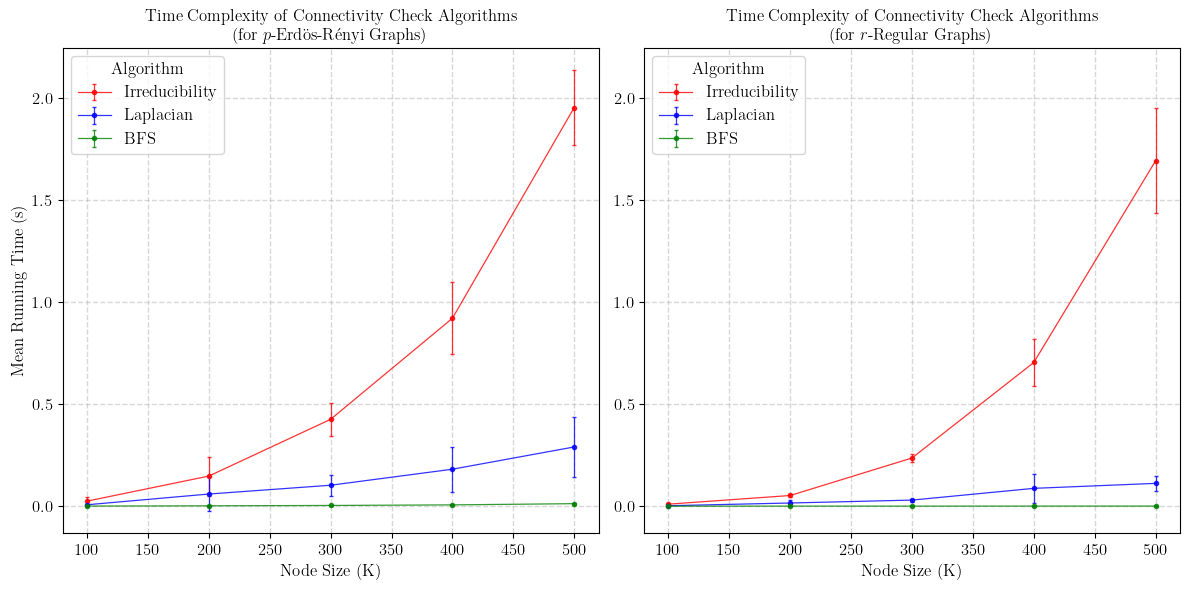

In [181]:
#Here we plot the time complexity of the three methods to check connectivity for Erdos-Renyi and r-regular graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

#Here we do the first plot
ax1.errorbar(nodes, er_mean_time_irr, fmt=".-r", yerr=er_sd_time_irr, elinewidth=0.9, capsize=1.5, linewidth=0.9, alpha=0.8, label='Irreducibility')
ax1.errorbar(nodes, er_mean_time_lapl, fmt=".-b", yerr=er_sd_time_lapl, elinewidth=0.9, capsize=1.5, linewidth=0.9, alpha=0.8, label='Laplacian')
ax1.errorbar(nodes, er_mean_time_bfs, fmt=".-g", yerr=er_sd_time_bfs, elinewidth=0.9, capsize=1.5, linewidth=0.9, alpha=0.8, label='BFS')
ax1.set_title("Time Complexity of Connectivity Check Algorithms \n (for $p$-Erdös-Rényi Graphs)")
ax1.legend(title="Algorithm", title_fontsize = 12)
ax1.grid(alpha = 0.5, linestyle='--', linewidth=1)
ax1.set_ylabel("Mean Running Time (s)")
ax1.set_xlabel("Node Size (K)")

#Here we do the second plot
ax2.errorbar(nodes, rr_mean_time_irr, fmt=".-r", yerr=rr_sd_time_irr, elinewidth=0.9, capsize=1.5, linewidth=0.9, alpha=0.8, label='Irreducibility')
ax2.errorbar(nodes, rr_mean_time_lapl, fmt=".-b", yerr=rr_sd_time_lapl, elinewidth=0.9, capsize=1.5, linewidth=0.9, alpha=0.8, label='Laplacian')
ax2.errorbar(nodes, rr_mean_time_bfs, fmt=".-g", yerr=rr_sd_time_bfs, elinewidth=0.9, capsize=1.5, linewidth=0.9, alpha=0.8, label='BFS')
ax2.set_title("Time Complexity of Connectivity Check Algorithms \n (for $r$-Regular Graphs)")
ax2.legend(title="Algorithm", title_fontsize = 12)
ax2.grid(alpha = 0.5, linestyle='--', linewidth=1)
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set_xlabel("Node Size (K)")

#Here we save the plot
plt.tight_layout()
plt.savefig("plots/connectivity_complexity.png", dpi=300)
pass

## **1.2: Probability of Connectivity (Monte Carlo Simulations)**

In this part of the code we perform Monte Carlo Simulations to estimate the Probability of Connectivity for $p$-Erdös-Renyi graphs and $r$-Regular Graphs.

In [173]:
def monte_carlo_erdos_renyi(max_p: float, n: int = 100, simulations: int = 1000):
    """
    This function computes the probability of connectivity for a random Erdos-Renyi graph of a given size and different parameter values.
    The function returns the probability of connectivity and the standard deviation of the probability of connectivity for each parameter value.

    Args:
        n (int): The number of nodes in the Erdos-Renyi graph.
        p (float): The parameter value for the Erdos-Renyi graph.
        simulations (int): The number of simulations to run to estimate the probability of connectivity.

    Returns:
        tuple: A tuple containing the probability of connectivity and the standard deviation of the probability of connectivity.
    """
    
    #Here we initialize the range of parameter values
    p_values = np.arange(0, max_p+0.01, 0.01)

    #Here we initialize the lists to store the probability of connectivity and the standard deviation of the probability of connectivity
    prob_connected = []
    sd_prob_connected = []

    #Here we run the simulations to estimate the probability of connectivity for each parameter value
    for p in p_values:
        #Here we initialize the lists to store the results of the simulations
        is_connected = []
        #Here we run the simulations to estimate the probability of connectivity
        for _ in range(simulations):
            #Here we create a random Erdos-Renyi graph and check if it is connected
            net = RandomNet(n=n, param=p, model = 'erdos-renyi')
            connected = net.check_connectivity(method='bfs')[0]
            #Here we store the result of the simulation
            is_connected.append(connected)
            
        #Here we compute the probability of connectivity and the standard deviation of the probability of connectivity
        prob_connected.append(np.mean(is_connected))
        sd_prob_connected.append(np.std(is_connected))

    #Here we return the p_values and the probability of connectivity and the standard deviation of the probability of connectivity
    return p_values, prob_connected, sd_prob_connected

def monte_carlo_r_regular(r: float, max_n: int = 100, simulations: int = 1000):
    """
    This function computes the probability of connectivity for a random r-Regular graph of a given r and different number of nodes.
    The function returns the probability of connectivity and the standard deviation of the probability of connectivity for each number of nodes.

    Args:
        r (int): The degree of the r-Regular graph.
        max_n (int): The maximum number of nodes to consider.
        simulations (int): The number of simulations to run to estimate the probability of connectivity.

    Returns:
        tuple: A tuple containing the number of nodes and the probability of connectivity and the standard deviation of the probability of connectivity.
    """
    
    #Here we initialize the range of node values
    n_values = np.arange(10, max_n+1, 2)

    #Here we initialize the lists to store the probability of connectivity and the standard deviation of the probability of connectivity
    prob_connected = []
    sd_prob_connected = []

    #Here we run the simulations to estimate the probability of connectivity for each parameter value
    for node in n_values:
        #Here we initialize the lists to store the results of the simulations
        is_connected = []
        #Here we run the simulations to estimate the probability of connectivity
        for _ in range(simulations):
            #Here we create a random Erdos-Renyi graph and check if it is connected
            net = RandomNet(n=node, param=r, model = 'r-regular')
            connected = net.check_connectivity(method='bfs')[0]
            #Here we store the result of the simulation
            is_connected.append(connected)
            
        #Here we compute the probability of connectivity and the standard deviation of the probability of connectivity
        prob_connected.append(np.mean(is_connected))
        sd_prob_connected.append(np.std(is_connected))

    #Here we return the n_values and the probability of connectivity and the standard deviation of the probability of connectivity
    return n_values, prob_connected, sd_prob_connected

def gaussian_confidence_interval(mean_list: list, sd_list: list):
    """
    This function computes the 95% confidence interval for a list of means and standard deviations using the Gaussian distribution.
    
    Args:
        mean_list (list): List of means
        sd_list (list): List of standard deviations
        alpha (float): Significance level
    
    Returns:
        tuple: Tuple containing the lower and upper bounds of the confidence interval
    """
    #Here we compute the confidence interval for the mean using the Gaussian distribution
    lower_bound = np.array(mean_list) - 1.96*np.array(sd_list)/np.sqrt(len(mean_list))
    upper_bound = np.array(mean_list) + 1.96*np.array(sd_list)/np.sqrt(len(mean_list))
    return lower_bound, upper_bound

#Here we run the simulations for the Erdos-Renyi model and the r-regular model
p_values, er_prob_connected, er_sd_prob_connected = monte_carlo_erdos_renyi(max_p = 0.25, n = 100, simulations = 1000)
n_values, rr_2_prob_connected, rr_2_sd_prob_connected = monte_carlo_r_regular(r = 2, max_n = 100, simulations = 1000)
n_values, rr_8_prob_connected, rr_8_sd_prob_connected = monte_carlo_r_regular(r = 8, max_n = 100, simulations = 1000)

#Here we compute the 95% confidence interval for the probability of connectivity
er_lower_bound, er_upper_bound = gaussian_confidence_interval(er_prob_connected, er_sd_prob_connected)
rr_2_lower_bound, rr_2_upper_bound = gaussian_confidence_interval(rr_2_prob_connected, rr_2_sd_prob_connected)
rr_8_lower_bound, rr_8_upper_bound = gaussian_confidence_interval(rr_8_prob_connected, rr_8_sd_prob_connected)

## **1.2.1: Probability of Connectivity (Plots)**

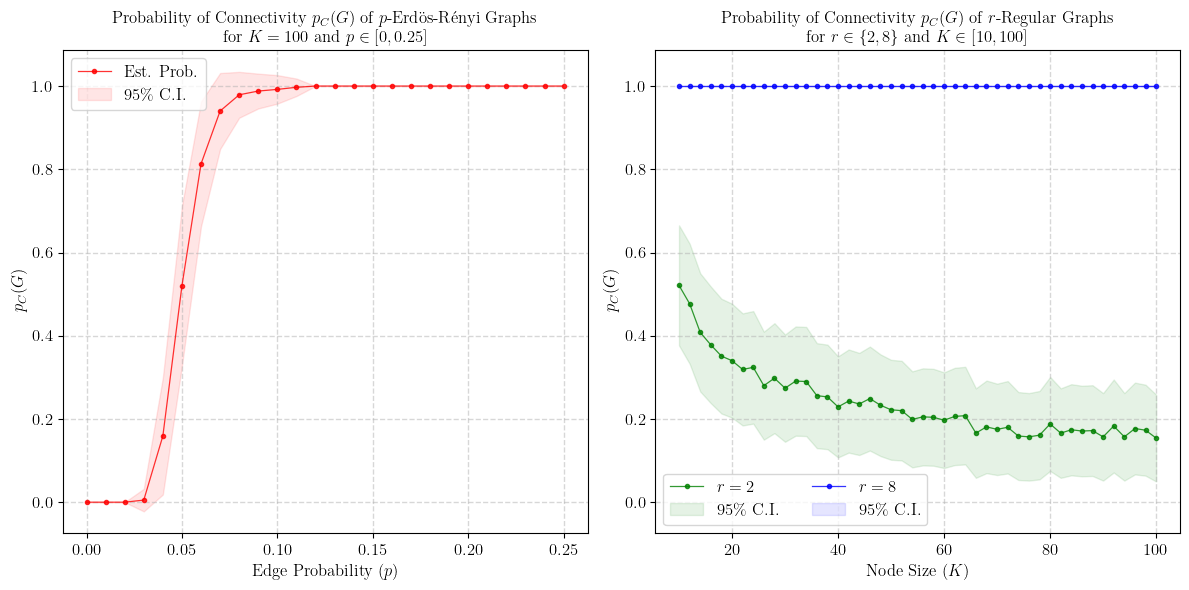

In [182]:
#Here we plot the time complexity of the three methods to check connectivity for Erdos-Renyi and r-regular graphs
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

#Here we do the first plot
ax1.plot(p_values, er_prob_connected, ".-r", linewidth=0.9, alpha=0.8, label='Est. Prob.')
ax1.fill_between(p_values, er_lower_bound, er_upper_bound, color='r', alpha=0.1, label='95\% C.I.')
ax1.set_title("Probability of Connectivity $p_{C}(G)$ of $p$-Erdös-Rényi Graphs \n for $K=100$ and $p \in [0, 0.25]$")
ax1.grid(alpha = 0.5, linestyle='--', linewidth=1)
ax1.set_xlabel("Edge Probability ($p$)")
ax1.set_ylabel("$p_{C}(G)$")
ax1.legend()

#Here we do the second plot
ax2.plot(n_values, rr_2_prob_connected, ".-g", linewidth=0.9, alpha=0.8, label='$r=2$')
ax2.fill_between(n_values, rr_2_lower_bound, rr_2_upper_bound, color='g', alpha=0.1, label='95\% C.I.')
ax2.plot(n_values, rr_8_prob_connected, ".-b", linewidth=0.9, alpha=0.8, label='$r=8$')
ax2.fill_between(n_values, rr_8_lower_bound, rr_8_upper_bound, color='b', alpha=0.1, label='95\% C.I.')
ax2.set_title("Probability of Connectivity $p_{C}(G)$ of $r$-Regular Graphs \n for $r \in \{2, 8\}$ and $K \in [10, 100]$")
ax2.grid(alpha = 0.5, linestyle='--', linewidth=1)
ax2.yaxis.set_tick_params(labelbottom=True)
ax2.set_xlabel("Node Size ($K$)")
ax2.set_ylabel("$p_{C}(G)$")
ax2.legend(ncol=2)

#Here we save the plot
plt.tight_layout()
plt.savefig("plots/connectivity_probability.png", dpi=300)
pass

## **2.1: Topology Algorithms**

In this part we implement the code for the two network types: $Flat-tree$ and $Jellyfish$

In [27]:
#Jellyfish

def Jellyfish_topology(switches, ports, r):    
    #create switch structure
    G = nx.random_regular_graph(r, switches)
    #label switches with 0
    for i in range(switches):
        G.nodes[i]['type'] = 0 
    #add servers labeling them as 1
    H = nx.Graph()
    H.add_nodes_from(G.nodes(data=True))
    H.add_edges_from(G.edges())
    servers_counter = 0
    for i in range(switches):
        for j in range(ports - r):
            if servers_counter <= n_servers:
                server_name = f'server_{i}_{j}'
                H.add_node(server_name)
                H.nodes[server_name]['type'] = 1
                H.add_edge(i, server_name)
                servers_counter += 1 
    return H

n = 64                           #number of ports
r = int(n/2)                     #number of neighbor
n_servers = (n**3)//4        #number of servers
n_switches = n_servers//(n-r)    #number of switches


# Construct Jellyfish topology
jelly = Jellyfish_topology(n_switches, n, r)

## **2.2: Evalution time**

In this part of the code we evaluate the mean response time as a function of N and normalized Job running cost as a function of N. From this data we give different plot.

### Flat-tree

In [28]:
def response_time_func(C,tau,L_f,L_o,E_X,T_0,f,N):
    
    E_X_i = E_X/N 
    input_data = L_f/N
    overhead_input = input_data*f
    
    low = 0.0                 
    high = (2*L_o)/N
    
    response = []
    sum_one_over_T_j = 0
    T_i_list = []
    one_over_T_i_list = []

    for i in range(1,N+1):
    
        if i <= 31:       
            T_i = 2 * tau * 2
            one_over_T_i = 1/T_i
            sum_one_over_T_j += one_over_T_i
            one_over_T_i_list.append(one_over_T_i)

            
        elif i > 31 and i <= 992:
            T_i = 2 * tau * 4
            one_over_T_i = 1/T_i
            sum_one_over_T_j += one_over_T_i
            one_over_T_i_list.append(one_over_T_i)
    
        elif i > 992 and i <= 64512:
            T_i = 2 * tau * 6
            one_over_T_i = 1/T_i
            sum_one_over_T_j += one_over_T_i
            one_over_T_i_list.append(one_over_T_i)
    
    for i in range(1,N+1):
        #Valutazione del tempo di esecuzione del server
        X_i = np.random.exponential(scale = E_X_i)
        task_time = T_0 + X_i
        #Valutazione size output
        L_o_i = np.random.uniform(low = low, high = high)
        #Overhead
        overhead_output = L_o_i * f 
        #throughput
        tp = C * (one_over_T_i_list[i-1]/sum_one_over_T_j)
        #valutazione tempo andata
        forward_time = (input_data+overhead_input)/tp
        #valutazione tempo ritorno
        return_time = (L_o_i+overhead_output)/tp
        r_t = forward_time + task_time + return_time
        response.append(r_t)
    response_time = np.max(response)

    return(response_time)

### Jellyfish

In [29]:
Capacity = 10 #Gbit/s
tau_time = 0.000005 #s
L_file = 32000 #Gbit, 4000 GB, -size of the file to which the job is applied
L_out = 32000 #Gbit, 4000 GB, output of the task
E_X_time = 28800 #sec, mean of the random variable
T_0_time = 30 #sec, fixed set-up time of the job running on one server (A)
csi = 0.1 #numerical coefficient
fraction = 48/1500 #fraction of the original data (overhead)
n = 64 #number of ports
S = int((pow(n,3))/4) #number of servers per topology


#constants
tau = 5*10**-6 
L_f = 32000 #in Gbit
f = 48/1500 #overhead
expected_time = 8 * 3600 #expected time in second
fixed_job_time_s = 30
L_zero = 32000
capacity = 10

In [30]:
def response_time(graph, N, tau, L_f, f, expected_time, fixed_job_time_s, L_zero, capacity):
  #get the list of servers
  servers = [node[0] for node in graph.nodes(data = True) if node[1]['type'] == 1] 
  #choose the main server
  main_server = random.choice(servers)
  #create a list of tuples with (server, number of hopes from the main_server)
  dict_hops = [(i,nx.shortest_path_length(graph, main_server, i)) for i in servers if i != main_server]
  #sort the server by closeness
  n_closest_servers = sorted(dict_hops,key = lambda x: x[1])
  #calculate the avg throughput
  avg_t = []
  closest_server_hopes = [i[1] for i in n_closest_servers[0:(n_servers)]]
  normalizing_term = sum(1/(2*tau*np.array(closest_server_hopes)))
  for i in closest_server_hopes:
    tj = 2*tau*i
    throughput = capacity * (1 / tj) / normalizing_term
    avg_t.append(throughput)
  #time forth
  input_data = np.full(n_servers - 1, (L_f/n_servers)) + ((L_f / n_servers) * f)
  #input_data = np.array([L_f/n_servers]) + ((L_f / n_servers) * f) #split data + overhead
  time_forth = input_data/np.array(avg_t) #time 
  #job time
  job_running_times = np.random.exponential(1/(expected_time/n_servers), n_servers - 1) + fixed_job_time_s
  #go back
  output_job = np.random.uniform(0, (2*L_zero/n_servers), n_servers - 1)
  output_data = output_job + (output_job * f)
  time_to_back = output_data / np.array(avg_t)
  response_time = np.max(time_forth + job_running_times + time_to_back)
  return response_time 

### Simulation

In [43]:
N = 10000
num_sim = 10

E_R_flatlist = []

for N_selected in range(1,N+1,100):
    num_server = N_selected
    sample_R_flat = []
    for _ in range(num_sim):
        #Flat-tree
        R_flat = response_time_func(Capacity,tau_time,L_file,L_out,E_X_time,T_0_time,fraction,num_server)
        sample_R_flat.append(R_flat)
    
    #F
    E_R_flat = np.mean(sample_R_flat)
    E_R_flatlist.append((N_selected, E_R_flat))

In [42]:
N = 10000
num_sim = 10

E_R_jellylist = []

for N_selected in range(1,N+1,200):
    num_server = N_selected
    sample_R_jelly = []
    for _ in range(num_sim):
        #Jellyfish
        value_j = response_time(jelly, num_server, tau, L_f, f, expected_time, fixed_job_time_s, L_zero, capacity)
        sample_R_jelly.append(value_j)
    #J
    E_R_jelly = np.mean(sample_R_jelly)
    E_R_jellylist.append((N_selected, E_R_jelly))

### Plot

In [24]:
N = 1000
value_jelly = []

for k in range(1, N+1, 50):
    value_f = response_time_func(Capacity,tau_time,L_file,L_out,E_X_time,T_0_time,fraction,N)
    value_j = response_time(jelly, k, tau, L_f, f, expected_time, fixed_job_time_s, L_zero, capacity)
    value_jelly.append((k, value_j))

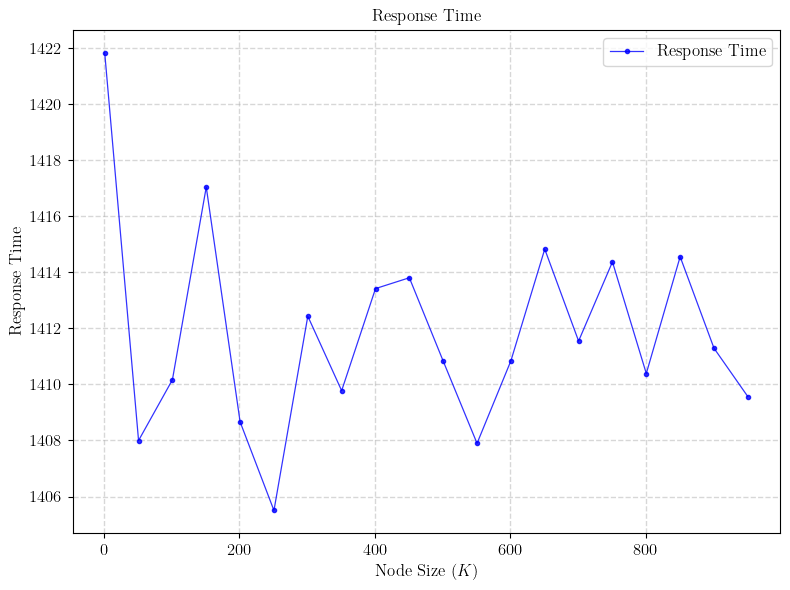

In [25]:
plt.figure(figsize=(8, 6))
plt.plot([point[0] for point in value_jelly], [point[1] for point in value_jelly], '.-', color='b', linewidth=0.9, alpha=0.8, label='Response Time')
plt.title("Response Time")
plt.xlabel("Node Size ($K$)")
plt.ylabel("Response Time")
plt.grid(alpha=0.5, linestyle='--', linewidth=1)
plt.legend()
plt.tight_layout()

plt.show()

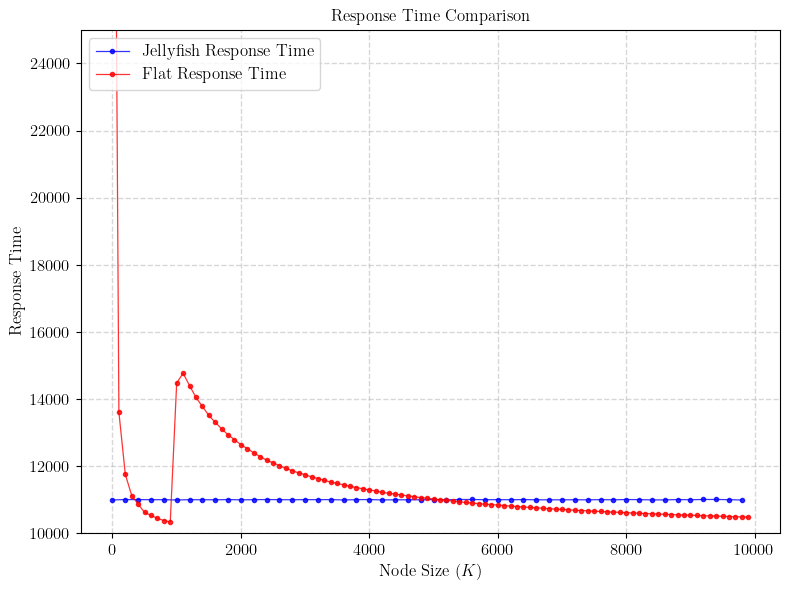

In [45]:
plt.figure(figsize=(8, 6))
plt.plot([point[0] for point in E_R_jellylist], [point[1] for point in E_R_jellylist], '.-', color='b', linewidth=0.9, alpha=0.8, label='Jellyfish Response Time')

# Grafico per i valori Flat
plt.plot([point[0] for point in E_R_flatlist], [point[1] for point in E_R_flatlist], '.-', color='r', linewidth=0.9, alpha=0.8, label='Flat Response Time')

# Titoli e etichette
plt.title("Response Time Comparison")
plt.xlabel("Node Size ($K$)")
plt.ylabel("Response Time")
plt.grid(alpha=0.5, linestyle='--', linewidth=1)

plt.ylim(10000, 25000)
# Aggiungi legenda
plt.legend(loc='upper left')

# Mostra il grafico
plt.tight_layout()
plt.show()